In [21]:
import numpy as np 
import scipy as sp 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import os

In [22]:
data_path = "./Reviews.csv"
pd_data = pd.read_csv(data_path)
type(pd_data)

pandas.core.frame.DataFrame

In [23]:
pd_data = pd_data[:10000]
pd_data

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [24]:
Top10_Id = pd_data['UserId'].value_counts()[:10]

In [25]:
def get_name(text):
    return pd_data[pd_data.UserId == text]['ProfileName'].values[0]
PN = pd.Series([get_name(text)for text in Top10_Id.index])
PN

0                                            c2
1    Carrie, "Formerly &#34;Sister Carrie&#34;"
2                                      M. Torma
3        Rebecca of Amazon "The Rebecca Review"
4                                  Jared Castle
5                                  Citizen John
6                              C. F. Hill "CFH"
7                        K. Padgett "familyof5"
8                                       kt rose
9                            Steven A. Peterson
dtype: object

In [26]:
def get_score(text):
    score = 0
    for num in pd_data[pd_data.UserId == text]['Score'].values:
        score += num
    return score/Top10_Id[text]
scores = pd.Series([get_score(text)for text in Top10_Id.index])
scores

0    3.882353
1    3.800000
2    4.111111
3    5.000000
4    4.714286
5    3.142857
6    4.428571
7    2.666667
8    2.666667
9    4.166667
dtype: float64

In [27]:
#1. Top-10 Reviewer
Top10_dict = {
    "UserId":Top10_Id.index,
    "ProfileName":PN,
    "Score count":Top10_Id.values,
    "Score mean":scores
}
Top10 = pd.DataFrame(Top10_dict)
Top10

,UserId,ProfileName,Score count,Score mean
0,A1Z54EM24Y40LL,c2,17,3.882353
1,A2SZLNSI5KOQJT,"Carrie, ""Formerly &#34;Sister Carrie&#34;""",10,3.800000
2,A35R32TA60XD57,M. Torma,9,4.111111
3,A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",8,5.000000
4,A3PJZ8TU8FDQ1K,Jared Castle,7,4.714286
5,A3NHUQ33CFH3VM,Citizen John,7,3.142857
6,A3OXHLG6DIBRW8,"C. F. Hill ""CFH""",7,4.428571
7,AQ6SHOW0VMZGF,"K. Padgett ""familyof5""",6,2.666667
8,A26NFIQ7KWI8Y7,kt rose,6,2.666667
9,AQQLWCMRNDFGI,Steven A. Peterson,6,4.166667


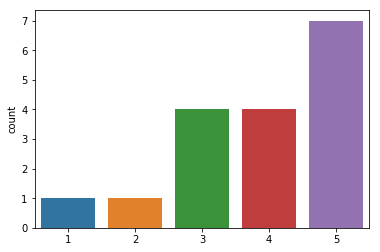

In [28]:
#2. Plot score distribution for the user with the most number of reviews
Top_score = pd_data[pd_data.UserId == Top10_Id.index[0]]['Score'].values
sns.countplot(Top_score)

<BarContainer object of 10 artists>

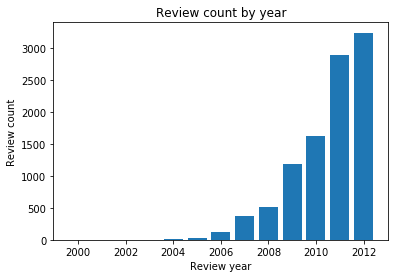

In [87]:
#3. Plot pandas Series DataFrame (Time->Date)
import time
years = []
year = {}
for i in range(10000):
    years.append(time.gmtime(pd_data['Time'][i]).tm_year)
for i in years:
    year[i] = 0
for i in years:
    year[i] += 1
year.keys()
year.values()
plt.xlabel('Review year')
plt.ylabel('Review count')
plt.title('Review count by year')
plt.bar(year.keys(),year.values())

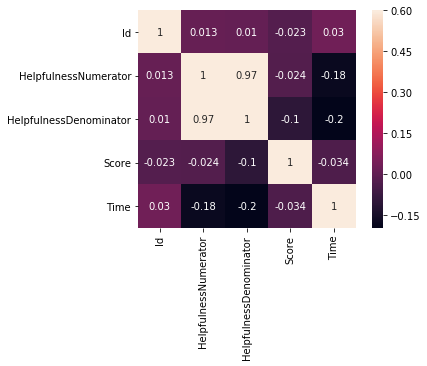

In [30]:
#4. Plot HeatMap using seaborn
sns.heatmap(pd_data.drop(columns = ['ProductId', 'UserId', 'ProfileName', 'Summary', 'Text']).corr(), vmax=0.6, square=True, annot=True)

(array([4878.,    0.,    0.,    0.,    0.,  689.,  225.,  422.,  317.,
        3469.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

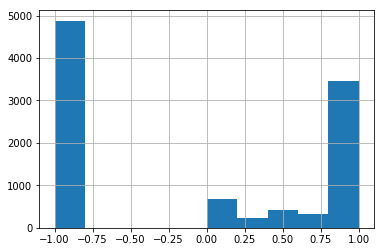

In [88]:
#5. Helpful percent
#HelpfulnessNumerator HelpfulnessDenominator
percent = []
for i in range(10000):
    if pd_data['HelpfulnessNumerator'][i] <= pd_data['HelpfulnessDenominator'][i]:
        if pd_data['HelpfulnessDenominator'][i] != 0:
            percent.append((pd_data['HelpfulnessNumerator'][i] / pd_data['HelpfulnessDenominator'][i]))
        elif pd_data['HelpfulnessNumerator'][i] == 0 and pd_data['HelpfulnessDenominator'][i] == 0:
            percent.append(-1)
plt.grid()
plt.hist(percent)